In [47]:
def build_vocab(target : list):
    data = []
    for fpath in target:
        with open(fpath, 'r') as f:
            for line in f.readlines():
                for char in line.replace('\n', ' ').split(' '):
                    if len(char) > 1 and char[1] == '.': continue # e.g. 0.1
                    if len(char) > 1 and char.isnumeric(): continue # e.g. 10
                    if len(char) > 1 and char.isalpha(): continue # e.g. mm
                    if len(char) > 1 and ('object' in char or 'Object' in char): continue
                    data.append(char)
        f.close()
    vocab = set(data)
    return vocab 


target = [
    './data/im2text/tgt-train.txt',
    './data/im2text/tgt-test.txt',
    './data/im2text/tgt-val.txt'
]

vocab = build_vocab(target)

print(len(vocab))


545


{'',
 '!',
 '"',
 '#',
 '&',
 "'",
 '(',
 ')',
 '*',
 '+',
 ',',
 '-',
 '--',
 '---',
 '.',
 '/',
 '0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 ':',
 ';',
 '<',
 '=',
 '>',
 '?',
 '@',
 'A',
 'B',
 'C',
 'D',
 'E',
 'F',
 'G',
 'H',
 'I',
 'J',
 'K',
 'L',
 'M',
 'N',
 'O',
 'P',
 'Q',
 'R',
 'S',
 'T',
 'U',
 'V',
 'W',
 'X',
 'Y',
 'Z',
 '[',
 '\\',
 '\\!',
 '\\"',
 '\\#',
 '\\&',
 "\\'",
 '\\*',
 '\\,',
 '\\-',
 '\\/',
 '\\:',
 '\\;',
 '\\AA',
 '\\Big',
 '\\Bigg',
 '\\Biggl',
 '\\Biggm',
 '\\Biggr',
 '\\Bigl',
 '\\Bigm',
 '\\Bigr',
 '\\Delta',
 '\\Downarrow',
 '\\Gamma',
 '\\Huge',
 '\\Im',
 '\\L',
 '\\LARGE',
 '\\Lambda',
 '\\Large',
 '\\Leftrightarrow',
 '\\Longleftarrow',
 '\\Longleftrightarrow',
 '\\Longrightarrow',
 '\\O',
 '\\Omega',
 '\\P',
 '\\Phi',
 '\\Pi',
 '\\Psi',
 '\\Re',
 '\\Rightarrow',
 '\\S',
 '\\SS',
 '\\Sigma',
 '\\Theta',
 '\\Upsilon',
 '\\Vert',
 '\\Xi',
 '\\[',
 '\\\\',
 '\\]',
 '\\^',
 '\\_',
 '\\acute',
 '\\ae',
 '\\aleph',
 '\\alpha',
 '\\amal

# 0. Importing Dataset

In [41]:
import pickle

vocab = pickle.load(open("./data/step2/dict_vocab.pkl", "rb"), encoding="latin1")
idx2word = pickle.load(open("./data/step2/dict_id2word.pkl", "rb"), encoding="latin1")
word2idx = pickle.load(open("./data/step2/df_word2id.pkl", "rb"), encoding="latin1")

print(f'''
vocab_keys : {vocab.keys()}
max_idx    : {list(idx2word.keys())[-1]}
''')


vocab_keys : dict_keys(['freq', 'id'])
max_idx    : 356



In [46]:
train_set = pickle.load(open("./data/training_56/df_train.pkl", "rb"), encoding="latin1")
test_set = pickle.load(open("./data/training_56/df_test.pkl", "rb"), encoding="latin1")
pruned_set = pickle.load(open("./data/step3/df_pruned.pkl", "rb"), encoding="latin1")

test_set

,image,height,width,word2id_len,bin_len,word2id,latex_ascii,padded_seq,padded_seq_len,seq_len,squashed_len,squashed_seq
11558,e3716c37ff8f7c4_basic.png,74,1074,145,151,"[173, 330, 317, 324, 353, 16, 355, 323, 353, 6...",\int d \xi _ { 0 } ^ { ( 3 ) } d \xi _ { 0 } ^...,"[173, 330, 317, 324, 353, 16, 355, 323, 353, 6...",151,146,146,"[173, 330, 317, 324, 353, 16, 355, 323, 353, 6..."
46183,f9de66cc93d61de_basic.png,35,167,16,31,"[183, 46, 324, 353, 212, 355, 10, 46, 324, 353...","\lbrack P _ { \mu } , P _ { \nu } \rbrack = 0 .","[183, 46, 324, 353, 212, 355, 10, 46, 324, 353...",31,17,17,"[183, 46, 324, 353, 212, 355, 10, 46, 324, 353..."
19460,033e749d99d19c4_basic.png,75,534,52,61,"[291, 353, 36, 355, 6, 337, 7, 29, 33, 6, 337,...",\tilde { F } ( k ) = C ( k ) \cdot \delta [ | ...,"[291, 353, 36, 355, 6, 337, 7, 29, 33, 6, 337,...",61,53,53,"[291, 353, 36, 355, 6, 337, 7, 29, 33, 6, 337,..."
64282,a29a32cbedfb593_basic.png,75,302,33,41,"[165, 353, 71, 355, 324, 353, 16, 355, 29, 71,...",\hat { \Delta } _ { 0 } = \Delta _ { 0 } - \fr...,"[165, 353, 71, 355, 324, 353, 16, 355, 29, 71,...",41,34,34,"[165, 353, 71, 355, 324, 353, 16, 355, 29, 71,..."
90983,e5d725f6e517e0d_basic.png,88,638,94,111,"[353, 160, 353, 141, 6, 83, 324, 353, 9, 355, ...",{ \frac { \delta ( \Phi _ { + } ^ { ( 1 ) } - ...,"[353, 160, 353, 141, 6, 83, 324, 353, 9, 355, ...",111,95,95,"[353, 160, 353, 141, 6, 83, 324, 353, 9, 355, ..."
95278,973a448772c762c_basic.png,76,602,57,61,"[332, 324, 353, 10, 345, 355, 9, 160, 353, 17,...","f _ { , s } + \frac { 1 } { \left( r + s \righ...","[332, 324, 353, 10, 345, 355, 9, 160, 353, 17,...",61,58,58,"[332, 324, 353, 10, 345, 355, 9, 160, 353, 17,..."
57553,12dcaa7441fce5a_basic.png,71,533,63,71,"[98, 324, 353, 6, 19, 9, 17, 7, 355, 323, 353,...",\alpha _ { ( 3 + 1 ) } ^ { - 1 } = \alpha _ { ...,"[98, 324, 353, 6, 19, 9, 17, 7, 355, 323, 353,...",71,64,64,"[98, 324, 353, 6, 19, 9, 17, 7, 355, 323, 353,..."
37971,58d4d75d49cf0de_basic.png,95,380,86,91,"[207, 353, 330, 355, 345, 324, 353, 32, 355, 3...","\mathrm { d } s _ { B } ^ { 2 } = \sum _ { j ,...","[207, 353, 330, 355, 345, 324, 353, 32, 355, 3...",91,87,87,"[207, 353, 330, 355, 345, 324, 353, 32, 355, 3..."
57023,677caadf429659d_basic.png,84,870,121,151,"[6, 41, 323, 353, 11, 17, 355, 7, 324, 353, 49...",( K ^ { - 1 } ) _ { S } ^ { S } = \frac { 1 - ...,"[6, 41, 323, 353, 11, 17, 355, 7, 324, 353, 49...",151,122,122,"[6, 41, 323, 353, 11, 17, 355, 7, 324, 353, 49..."
47501,161d1b1af317ce8_basic.png,89,770,77,81,"[252, 6, 289, 10, 350, 7, 356, 29, 356, 160, 3...","\rho ( \theta , x ) ~ = ~ \frac { 1 } { 2 \pi ...","[252, 6, 289, 10, 350, 7, 356, 29, 356, 160, 3...",81,78,78,"[252, 6, 289, 10, 350, 7, 356, 29, 356, 160, 3..."


# Data Loader

In [47]:
idx2word

{0: '\\eos',
 1: '\\bos',
 2: '!',
 3: '"',
 4: '&',
 5: "'",
 6: '(',
 7: ')',
 8: '*',
 9: '+',
 10: ',',
 11: '-',
 12: '--',
 13: '---',
 14: '.',
 15: '/',
 16: '0',
 17: '1',
 18: '2',
 19: '3',
 20: '4',
 21: '5',
 22: '6',
 23: '7',
 24: '8',
 25: '9',
 26: ':',
 27: ';',
 28: '<',
 29: '=',
 30: '>',
 31: 'A',
 32: 'B',
 33: 'C',
 34: 'D',
 35: 'E',
 36: 'F',
 37: 'G',
 38: 'H',
 39: 'I',
 40: 'J',
 41: 'K',
 42: 'L',
 43: 'M',
 44: 'N',
 45: 'O',
 46: 'P',
 47: 'Q',
 48: 'R',
 49: 'S',
 50: 'T',
 51: 'U',
 52: 'V',
 53: 'W',
 54: 'X',
 55: 'Y',
 56: 'Z',
 57: '[',
 58: '\\',
 59: '\\!',
 60: '\\#',
 61: '\\,',
 62: '\\/',
 63: '\\:',
 64: '\\;',
 65: '\\Big',
 66: '\\Bigg',
 67: '\\Biggl',
 68: '\\Biggr',
 69: '\\Bigl',
 70: '\\Bigr',
 71: '\\Delta',
 72: '\\Gamma',
 73: '\\Im',
 74: '\\L',
 75: '\\Lambda',
 76: '\\Large',
 77: '\\Leftrightarrow',
 78: '\\Longleftrightarrow',
 79: '\\Longrightarrow',
 80: '\\O',
 81: '\\Omega',
 82: '\\P',
 83: '\\Phi',
 84: '\\Pi',
 85: '\\P

In [2]:
from dataset import LatexDataset

test_set = LatexDataset('test')
train_set = LatexDataset('train')

In [3]:
len(train_set)

89096

In [4]:
len(test_set)

4648

In [5]:
test_set.data

,image,height,width,word2id_len,bin_len,word2id,latex_ascii,padded_seq,padded_seq_len,seq_len,squashed_len,squashed_seq
11558,e3716c37ff8f7c4_basic.png,74,1074,145,151,"[173, 330, 317, 324, 353, 16, 355, 323, 353, 6...",\int d \xi _ { 0 } ^ { ( 3 ) } d \xi _ { 0 } ^...,"[173, 330, 317, 324, 353, 16, 355, 323, 353, 6...",151,146,146,"[173, 330, 317, 324, 353, 16, 355, 323, 353, 6..."
46183,f9de66cc93d61de_basic.png,35,167,16,31,"[183, 46, 324, 353, 212, 355, 10, 46, 324, 353...","\lbrack P _ { \mu } , P _ { \nu } \rbrack = 0 .","[183, 46, 324, 353, 212, 355, 10, 46, 324, 353...",31,17,17,"[183, 46, 324, 353, 212, 355, 10, 46, 324, 353..."
19460,033e749d99d19c4_basic.png,75,534,52,61,"[291, 353, 36, 355, 6, 337, 7, 29, 33, 6, 337,...",\tilde { F } ( k ) = C ( k ) \cdot \delta [ | ...,"[291, 353, 36, 355, 6, 337, 7, 29, 33, 6, 337,...",61,53,53,"[291, 353, 36, 355, 6, 337, 7, 29, 33, 6, 337,..."
64282,a29a32cbedfb593_basic.png,75,302,33,41,"[165, 353, 71, 355, 324, 353, 16, 355, 29, 71,...",\hat { \Delta } _ { 0 } = \Delta _ { 0 } - \fr...,"[165, 353, 71, 355, 324, 353, 16, 355, 29, 71,...",41,34,34,"[165, 353, 71, 355, 324, 353, 16, 355, 29, 71,..."
90983,e5d725f6e517e0d_basic.png,88,638,94,111,"[353, 160, 353, 141, 6, 83, 324, 353, 9, 355, ...",{ \frac { \delta ( \Phi _ { + } ^ { ( 1 ) } - ...,"[353, 160, 353, 141, 6, 83, 324, 353, 9, 355, ...",111,95,95,"[353, 160, 353, 141, 6, 83, 324, 353, 9, 355, ..."
95278,973a448772c762c_basic.png,76,602,57,61,"[332, 324, 353, 10, 345, 355, 9, 160, 353, 17,...","f _ { , s } + \frac { 1 } { \left( r + s \righ...","[332, 324, 353, 10, 345, 355, 9, 160, 353, 17,...",61,58,58,"[332, 324, 353, 10, 345, 355, 9, 160, 353, 17,..."
57553,12dcaa7441fce5a_basic.png,71,533,63,71,"[98, 324, 353, 6, 19, 9, 17, 7, 355, 323, 353,...",\alpha _ { ( 3 + 1 ) } ^ { - 1 } = \alpha _ { ...,"[98, 324, 353, 6, 19, 9, 17, 7, 355, 323, 353,...",71,64,64,"[98, 324, 353, 6, 19, 9, 17, 7, 355, 323, 353,..."
37971,58d4d75d49cf0de_basic.png,95,380,86,91,"[207, 353, 330, 355, 345, 324, 353, 32, 355, 3...","\mathrm { d } s _ { B } ^ { 2 } = \sum _ { j ,...","[207, 353, 330, 355, 345, 324, 353, 32, 355, 3...",91,87,87,"[207, 353, 330, 355, 345, 324, 353, 32, 355, 3..."
57023,677caadf429659d_basic.png,84,870,121,151,"[6, 41, 323, 353, 11, 17, 355, 7, 324, 353, 49...",( K ^ { - 1 } ) _ { S } ^ { S } = \frac { 1 - ...,"[6, 41, 323, 353, 11, 17, 355, 7, 324, 353, 49...",151,122,122,"[6, 41, 323, 353, 11, 17, 355, 7, 324, 353, 49..."
47501,161d1b1af317ce8_basic.png,89,770,77,81,"[252, 6, 289, 10, 350, 7, 356, 29, 356, 160, 3...","\rho ( \theta , x ) ~ = ~ \frac { 1 } { 2 \pi ...","[252, 6, 289, 10, 350, 7, 356, 29, 356, 160, 3...",81,78,78,"[252, 6, 289, 10, 350, 7, 356, 29, 356, 160, 3..."


ToPILImage(mode=tensor([[[1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         ...,
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.],
         [1., 1., 1.,  ..., 1., 1., 1.]]]))


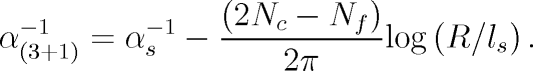

In [11]:
from torchvision.transforms import ToPILImage

img_tensor = test_set._get_image('12dcaa7441fce5a_basic.png')
pil_img = ToPILImage(img_tensor)
print(pil_img)

from IPython.display import Image
Image('./data/formula_images/' + '12dcaa7441fce5a_basic.png')

In [ ]:
class CNN(nn.Module):
    def __init__(self, params):
        super(CNN, self).__init__()

        self.cnn = nn.Sequential(
            nn.Conv2d(in_channels=1, out_channels=16, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_sieze=2, stride=2, padding=1),
            
            nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_sieze=2, stride=2, padding=1),
            
            nn.Conv2d(in_channels=32, out_channels=64, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_sieze=2, stride=2, padding=1),
            
            nn.Conv2d(in_channels=64, out_channels=128, kernel_size=3, stride=1, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_sieze=(2, 1), stride==(2, 1), padding=0),
            
            nn.Conv2d(in_channels=128, out_channels=256, kernel_size=3, stride=1, padding=1),
            nn.ReLU())
    
    def encode(self, images, batch_size):
            latent_rep = self.cnn(images)
            latent_rep = 
        
    def forward(self, images, formula):
        features = self.cnn(images)
        return self.dropout(self.relu(features))
